In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("C:/Users/56961/Desktop/Proyecto ML CEN/dataset.csv/dataset.csv",sep=";")
dataset.drop(["node"],inplace=True,axis=1)
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [3]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [4]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")
test=dataset.query("date.dt.year==2022")

In [5]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [6]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [7]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [8]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [9]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

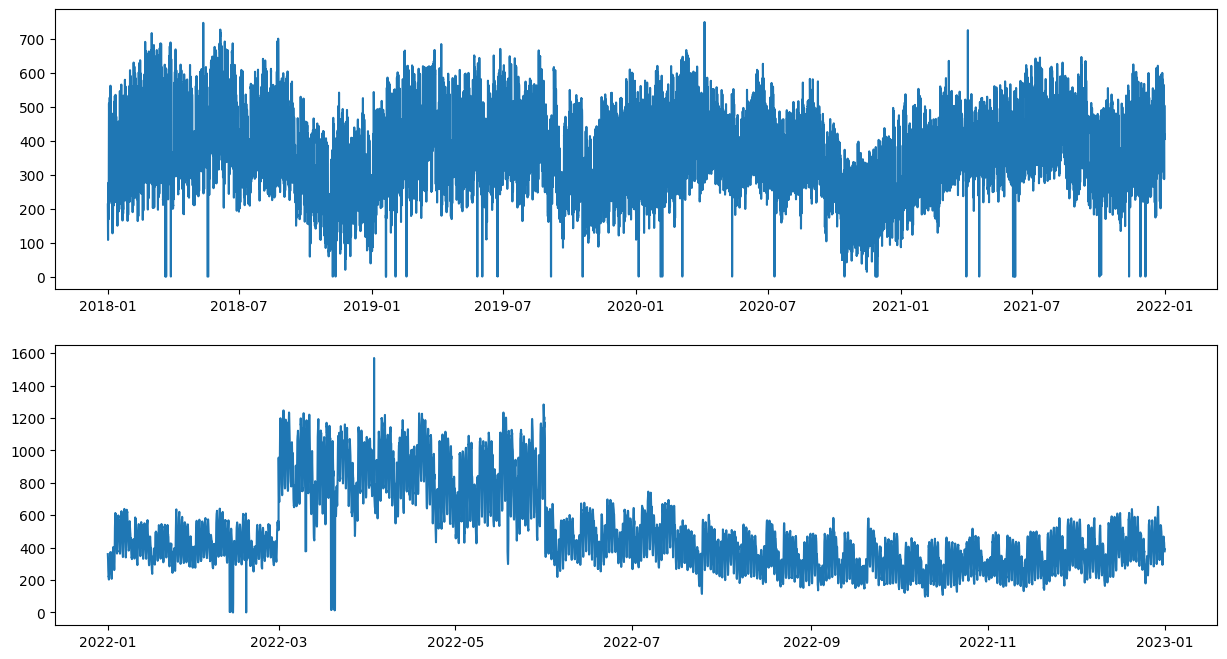

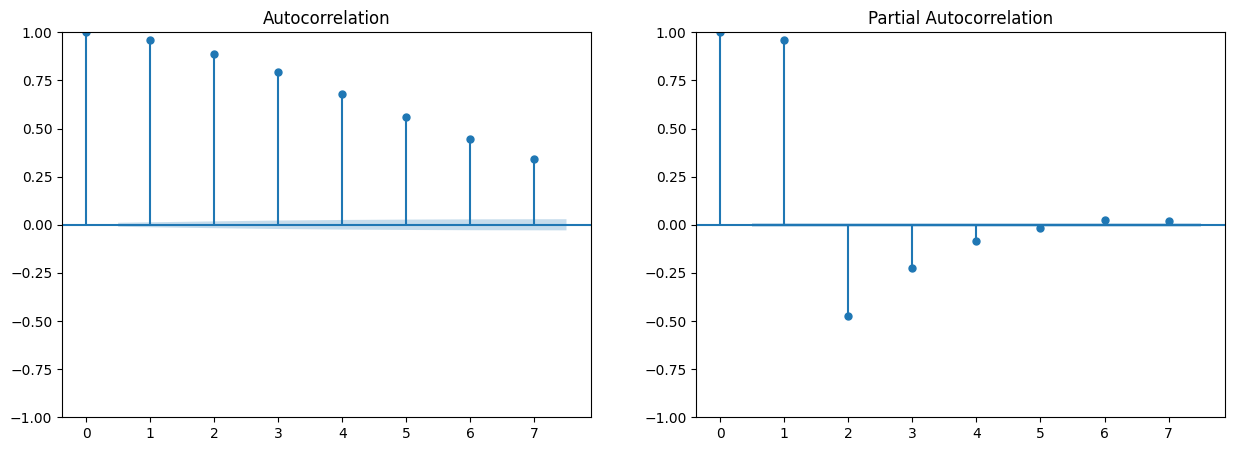

In [10]:
subestacion="ELSALTO"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

In [11]:
data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

In [12]:
data["year"]=data["date"].dt.year
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


,consumption,date,day,hour,month,year
date,,,,,,
2018-01-01 00:00:00,212.495636,2018-01-01 00:00:00,1,0,1,2018
2018-01-01 01:00:00,200.802108,2018-01-01 01:00:00,1,1,1,2018
2018-01-01 02:00:00,189.173441,2018-01-01 02:00:00,1,2,1,2018
2018-01-01 03:00:00,181.010940,2018-01-01 03:00:00,1,3,1,2018
2018-01-01 04:00:00,168.960606,2018-01-01 04:00:00,1,4,1,2018


In [13]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys_elsalto.csv")

In [14]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_elsalto.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

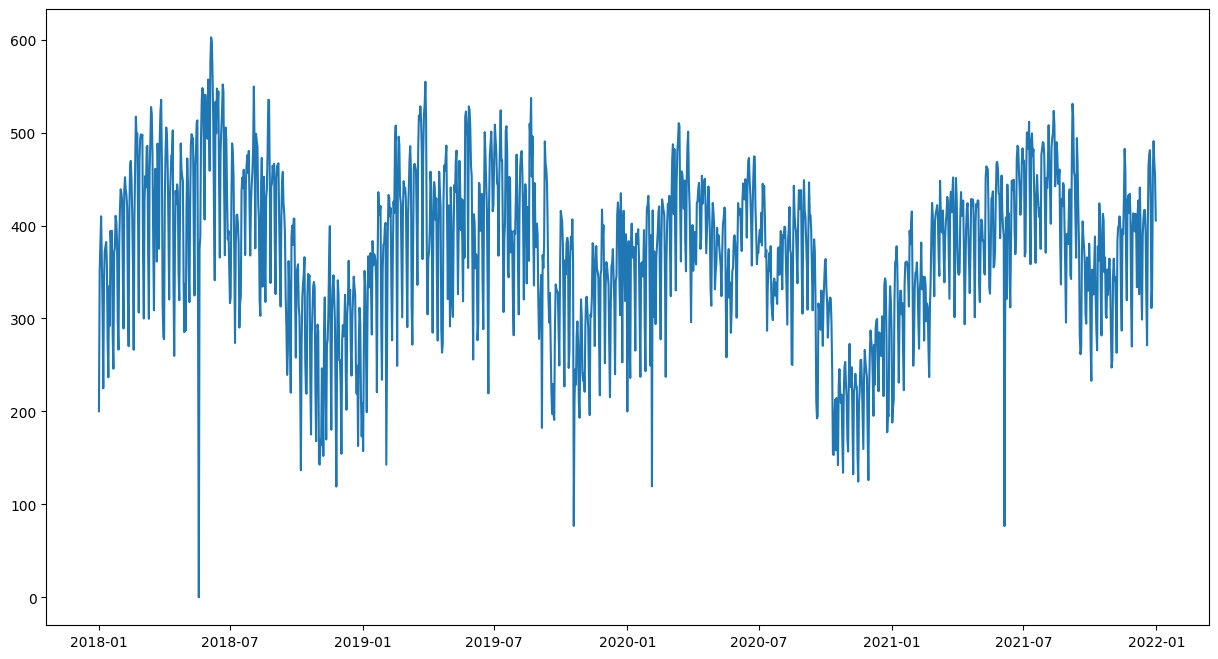

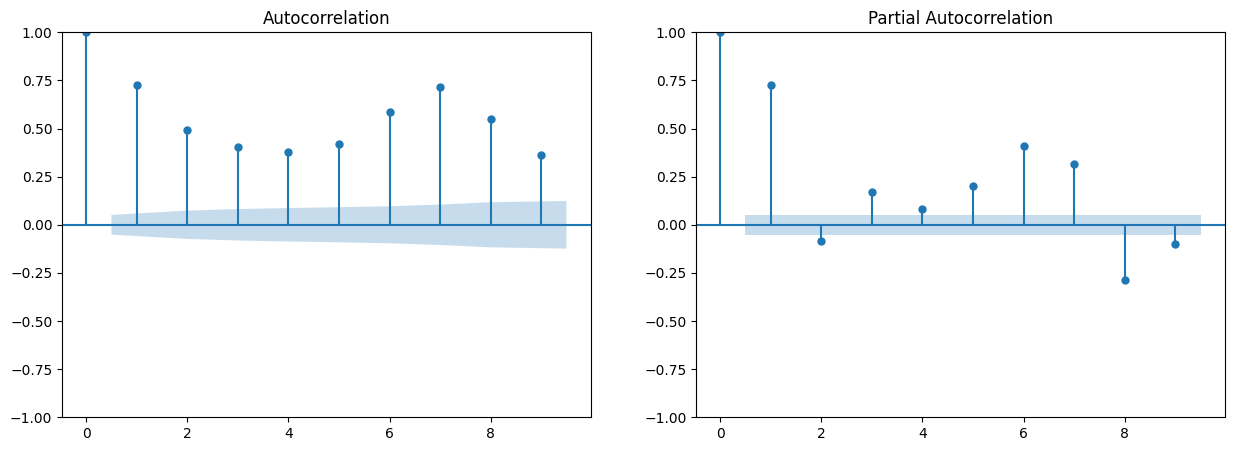

In [15]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.452829
p-value: 0.009284
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np

In [19]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)

# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']

# Ajustar el modelo ARIMA con los términos óptimos
modelo_elsalto_d = ARIMA(ys, order=best_order)
m_ad1 = modelo_elsalto_d.fit()

# Calcular el error cuadrático medio
mse = m_ad1.mse

# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic

# Realizar predicciones
ysp = m_ad1.predict()

# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16253.485, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16250.210, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16241.744, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16251.493, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15938.368, Time=1.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15833.871, Time=3.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16128.779, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15829.821, Time=8.69 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16091.446, Time=1.97 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15767.206, Time=10.56 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=15993.546, Time=1.73 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=15619.502, Time=8.83 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=15687.847, Time=3.29 sec
 ARIMA(5,1,2)(0,0,0)[0] 

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE: 2274.2847264364955
AIC: 15425.895284495626
MAPE: 959207754900628.6


c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
modelo_elsalto_d=ARIMA(ys,order=(4,1,3))
m_ad1=modelo_elsalto_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE 2274.2847264364955
AIC 15425.895284495626
MAPE 959207754900628.6


c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


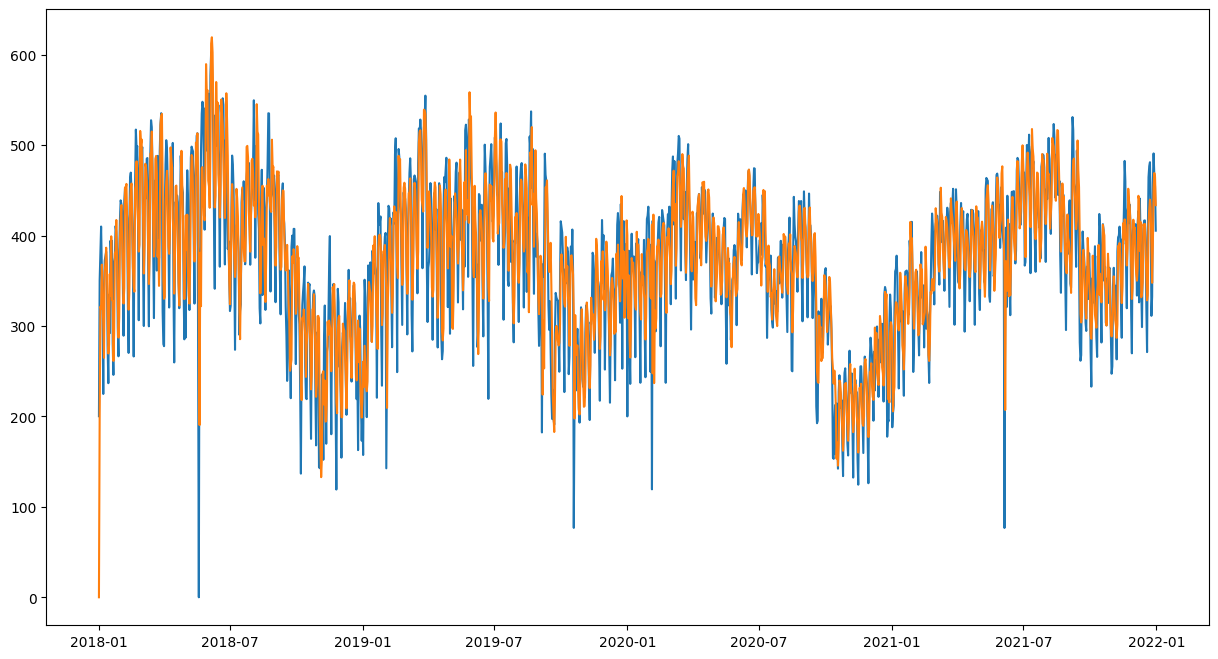

In [21]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [22]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [23]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [24]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [25]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [26]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 141513.0938 - mae: 365.7912 - mape: 710810.7500 - mse: 141513.0938
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 126702.3359 - mae: 345.0078 - mape: 29878034.0000 - mse: 126702.3359
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 111824.7891 - mae: 322.7792 - mape: 61952668.0000 - mse: 111824.7891 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 96470.6328 - mae: 298.1014 - mape: 97458512.0000 - mse: 96470.6328  
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 80844.9219 - mae: 270.7132 - mape: 136971936.0000 - mse: 80844.9219
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 65410.3867 - mae: 240.6477 - mape: 180555664.0000 - mse: 65410.3867
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 50777.0000 - mae: 208.6773 - mape: 227907424.0000 - mse: 50777.0000
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 37631.0391 - mae: 176.0322 - mape: 278272288.0000 - mse: 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


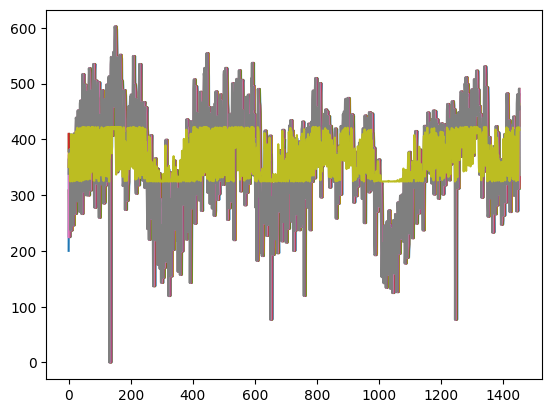

In [28]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [29]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4575.6592 - mae: 52.2789 - mape: 477807712.0000 - mse: 4575.6592
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4421.3101 - mae: 51.2753 - mape: 471630624.0000 - mse: 4421.3101 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4331.1191 - mae: 50.8360 - mape: 469369280.0000 - mse: 4331.1191 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4226.9917 - mae: 50.0664 - mape: 467203616.0000 - mse: 4226.9917 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4112.4673 - mae: 49.3982 - mape: 465917952.0000 - mse: 4112.4673 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4017.5518 - mae: 48.5243 - mape: 464549600.0000 - mse: 4017.5518 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3925.9705 - mae: 48.0213 - mape: 460682624.0000 - mse: 3925.9705
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3814.4641 - mae: 47.3338 - mape: 460185344.0000 - mse: 3814.4641 
Epoch 9/10

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


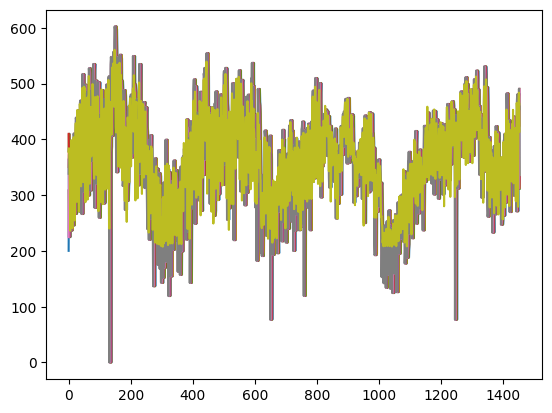

In [30]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
414.19696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
347.74182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
317.88437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
403.38217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
428.03998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
427.648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
425.04657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
406.6465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
351.712
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
317.0243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
390.61707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
416.85788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
418.95758
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
418.69775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
405.3672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
356.06253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
322.6506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
388.1055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
413.99704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
416.79825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
417.35464
1

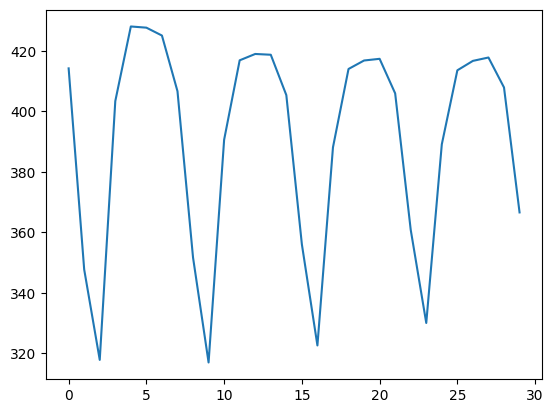

In [31]:
ultimo=list(yw[-1].copy())
forecasts=[]
for i in range(30):
    data=np.array(np.asarray([ultimo]))
    forecast=model.predict(data)
    valor=forecast[0][0]
    print(valor)
    forecasts.append(valor)
    ultimo.pop(0)
    ultimo.append(valor)
plt.plot(forecasts)

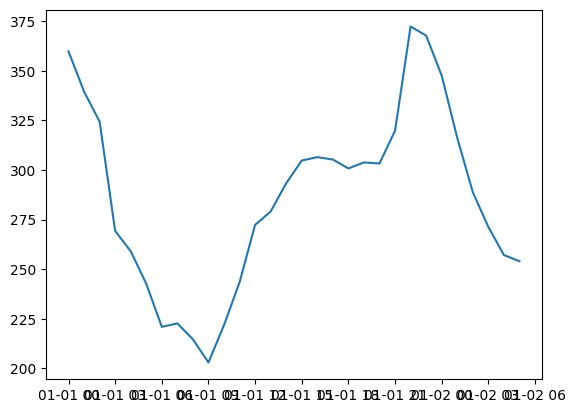

In [32]:
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
plt.plot(xt[:30],yt[:30])

## Modelado MultiHeadAttention

In [33]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [34]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [35]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [36]:
seed=29052002
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
yw[:1]

array([[200.21368333, 350.59569667, 378.79620733, 409.964318  ,
        363.7424855 , 308.58754167, 224.820349  , 338.49849942]])

In [38]:
np.flip(yw[:1])

array([[338.49849942, 224.820349  , 308.58754167, 363.7424855 ,
        409.964318  , 378.79620733, 350.59569667, 200.21368333]])

In [39]:
tensor=tf.constant(yw[:1])
tensor

<tf.Tensor: shape=(1, 8), dtype=float64, numpy=
array([[200.21368333, 350.59569667, 378.79620733, 409.964318  ,
        363.7424855 , 308.58754167, 224.820349  , 338.49849942]])>

In [40]:
import keras
from keras.layers import Lambda
layer = Lambda(lambda x: keras.ops.flip(x))
layer(tensor)

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[338.4985 , 224.82034, 308.58755, 363.7425 , 409.96432, 378.7962 ,
        350.5957 , 200.21368]], dtype=float32)>

In [41]:
d=128
input=Input(name="activity",shape=(8,1))
reverse=Lambda(lambda x: keras.ops.flip(x))(input)
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, reverse,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 8, 1)      │          0 │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 156096.9531 - mae: 385.1572 - mape: 9090871.0000 - mse: 156096.9531
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 144365.6094 - mae: 370.2679 - mape: 628829.8750 - mse: 144365.6094
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 122533.6094 - mae: 339.9357 - mape: 18090154.0000 - mse: 122533.6094
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 57797.8594 - mae: 225.6281 - mape: 92083312.0000 - mse: 57797.8594
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9605.5449 - mae: 76.9168 - mape: 249424112.0000 - mse: 9605.5449
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 21076.9219 - mae: 124.8097 - mape: 341833472.0000 - mse: 21076.9219
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6107.1089 - mae: 60.0511 - mape: 269739680.0000 - mse: 6107.1089
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11388.4844 - mae: 88.8465 - mape: 359958848.0000 - mse: 11388.4844


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


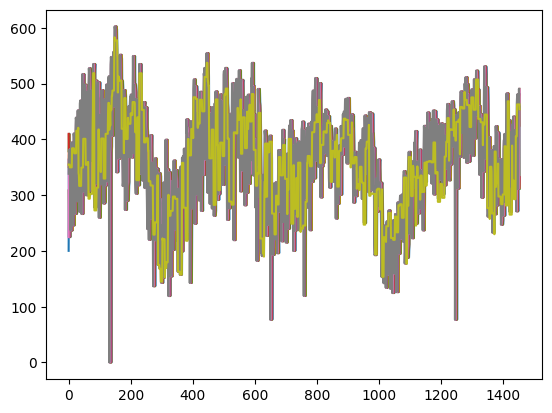

In [43]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [44]:
tag="att"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=100,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7811.2031 - mae: 68.1254 - mape: 491419104.0000 - mse: 7811.2031
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7253.2568 - mae: 65.8531 - mape: 402041952.0000 - mse: 7253.2568
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5831.1177 - mae: 58.3124 - mape: 255737680.0000 - mse: 5831.1177
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5917.7808 - mae: 58.6669 - mape: 249293616.0000 - mse: 5917.7808
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5822.4062 - mae: 58.0105 - mape: 255555296.0000 - mse: 5822.4062
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5863.4346 - mae: 58.2673 - mape: 250353840.0000 - mse: 5863.4346
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5807.4941 - mae: 57.8847 - mape: 254299760.0000 - mse: 5807.4941
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5826.8281 - mae: 58.0029 - mape: 251995120.0000 - mse: 5826.8281
Epoch 9/100
6/6 

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


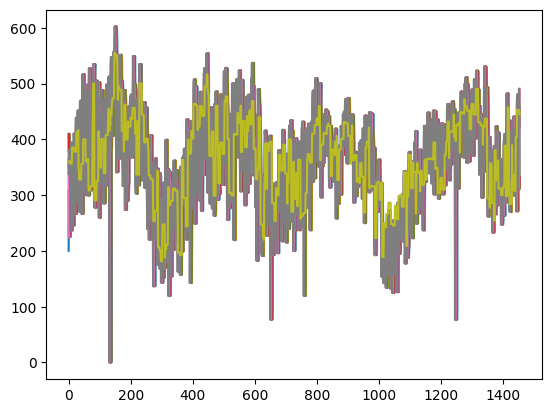

In [45]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

## Modelado Attention

In [46]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [47]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [48]:
d=128
input=Input(name="activity",shape=(8,1))
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model=Model(inputs=input,outputs=output)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=128, epochs=4,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 145836.0000 - mae: 371.3405 - mape: 46668584.0000 - mse: 145836.0000
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55020.1719 - mae: 210.0935 - mape: 185729760.0000 - mse: 55020.1719
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17368.8477 - mae: 111.0500 - mape: 1135236352.0000 - mse: 17368.8477
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7491.1455 - mae: 74.0549 - mape: 729025408.0000 - mse: 7491.1455 


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


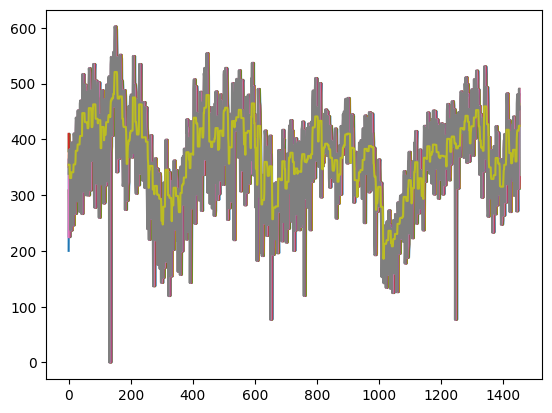

In [50]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [51]:
tag="mhatt"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=128, epochs=4,shuffle=True,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4780.8579 - mae: 53.7129 - mape: 852302208.0000 - mse: 4780.8579
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4284.8696 - mae: 50.1646 - mape: 852516096.0000 - mse: 4284.8696 
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4239.5991 - mae: 49.9365 - mape: 864840128.0000 - mse: 4239.5991 
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4217.0679 - mae: 49.9135 - mape: 869593024.0000 - mse: 4217.0679 


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


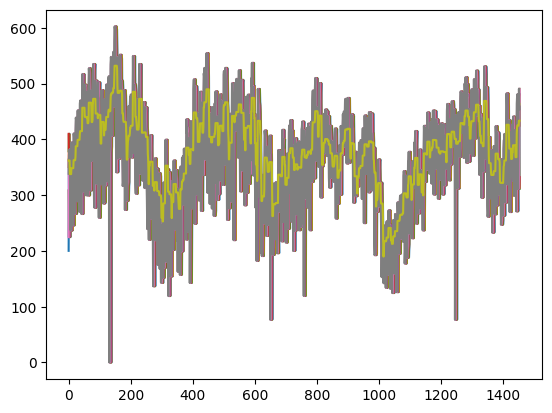

In [52]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)